In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import utils
from utils import unpickle_object
from stan_models import plot_simple_model_results
from stan_models import Bayesian_model
from stan_models import sMAPE
from stan_models import make_prediction_stan_sampling
from processing import M5Data

['/Users/ryznerf/Documents/0_MIT/Spring_2022/0_Projects/1_Bayesian_Modelling_project/BayesianSales/main_code', '/Users/ryznerf/Documents/0_MIT/Spring_2022/0_Projects/1_Bayesian_Modelling_project/BayesianSales', '/Users/ryznerf/Documents/0_MIT/Spring_2022/0_Projects/1_Bayesian_Modelling_project/BayesianSales/data_processing', '/Users/ryznerf/Documents/0_MIT/Spring_2022/0_Projects/1_Bayesian_Modelling_project/BayesianSales/data_processing/data', '/Users/ryznerf/Documents/0_MIT/Spring_2022/0_Projects/1_Bayesian_Modelling_project/BayesianSales/data_processing/processing_code', '/Users/ryznerf/Documents/0_MIT/Spring_2022/0_Projects/1_Bayesian_Modelling_project/BayesianSales/main_code', '/Users/ryznerf/anaconda3/envs/stan/lib/python310.zip', '/Users/ryznerf/anaconda3/envs/stan/lib/python3.10', '/Users/ryznerf/anaconda3/envs/stan/lib/python3.10/lib-dynload', '', '/Users/ryznerf/anaconda3/envs/stan/lib/python3.10/site-packages', '/Users/ryznerf/Documents/0_MIT/Spring_2022/0_Projects/1_Bayesian

In [189]:
train_date_split='2014-06-01'

In [190]:
# initialize the dataset that was used for training
queried_item = "item_id == 'FOODS_1_096'"
model = Bayesian_model(day_start=1, day_end=1520)
_ = model.query_model_data(query=queried_item)

Using query: item_id == 'FOODS_1_096'
Processed data for query: item_id == 'FOODS_1_096'


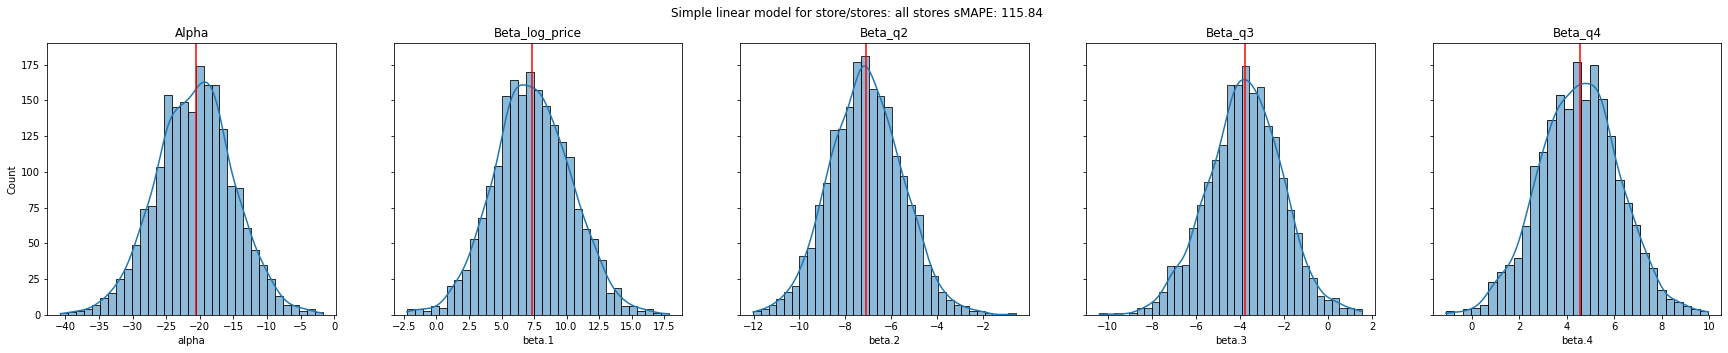

sMAPE:  115.83600521078564


In [36]:
## NON- LOGGED DATA
# plot for the single beta model
simple_model_container = unpickle_object('model_outputs/log_basic_model.pkl')
df_simple = simple_model_container['full']

local_test = model.create_test_data(train_date_split)
_, smape = make_prediction_stan_sampling(df_simple, local_test, True)

plot_simple_model_results(samples_df= df_simple, shop_name='all stores' + ' sMAPE: ' + str(np.round(smape,2)), save= True, save_location='fit_plots/non_log_simple_model.png')
print('sMAPE: ', smape)

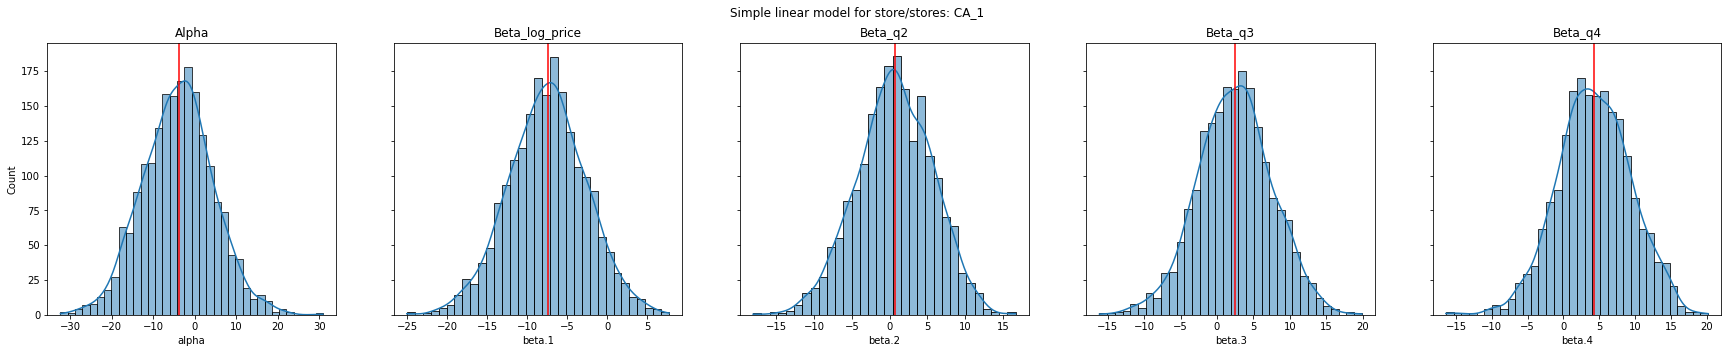

sMAPE:  189.05332758873027


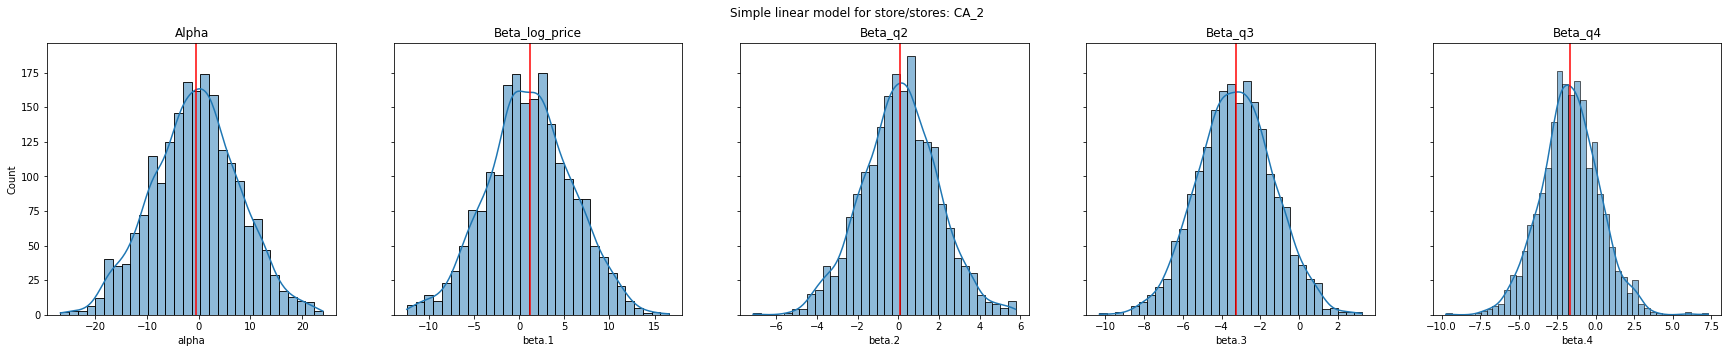

sMAPE:  101.11432278942037


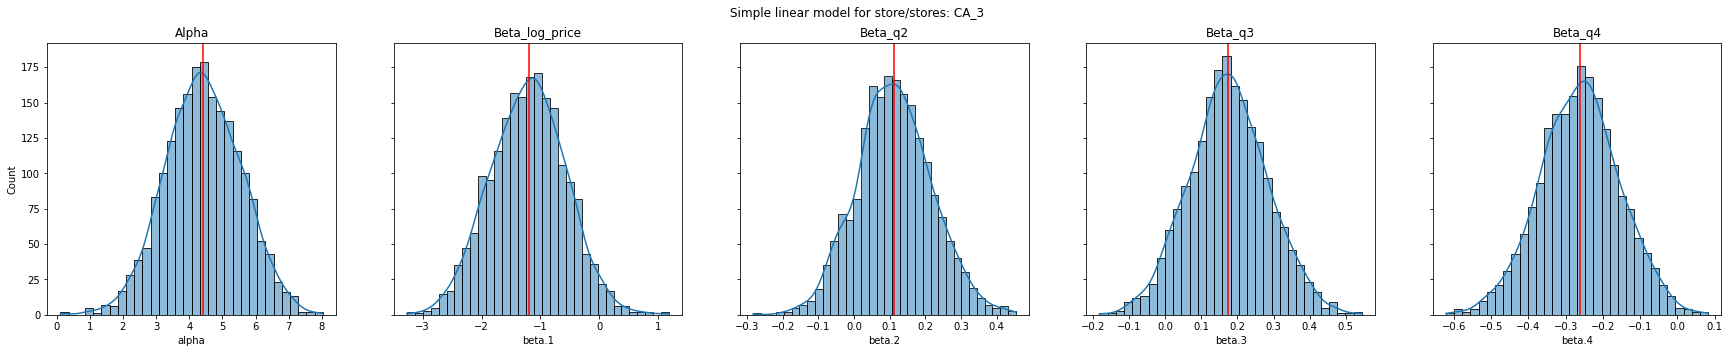

sMAPE:  199.76701624257043


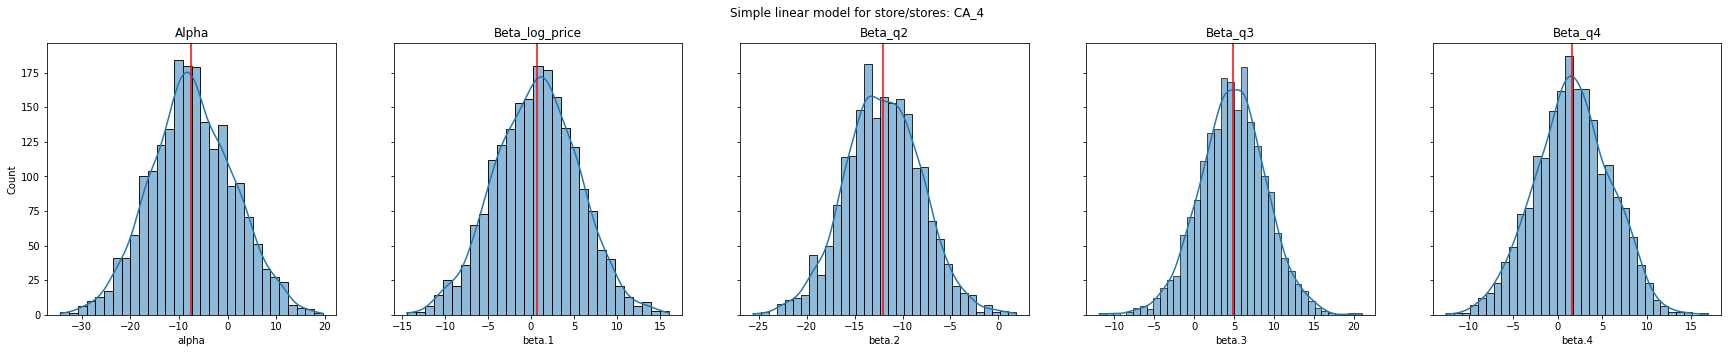

sMAPE:  135.90148088484793


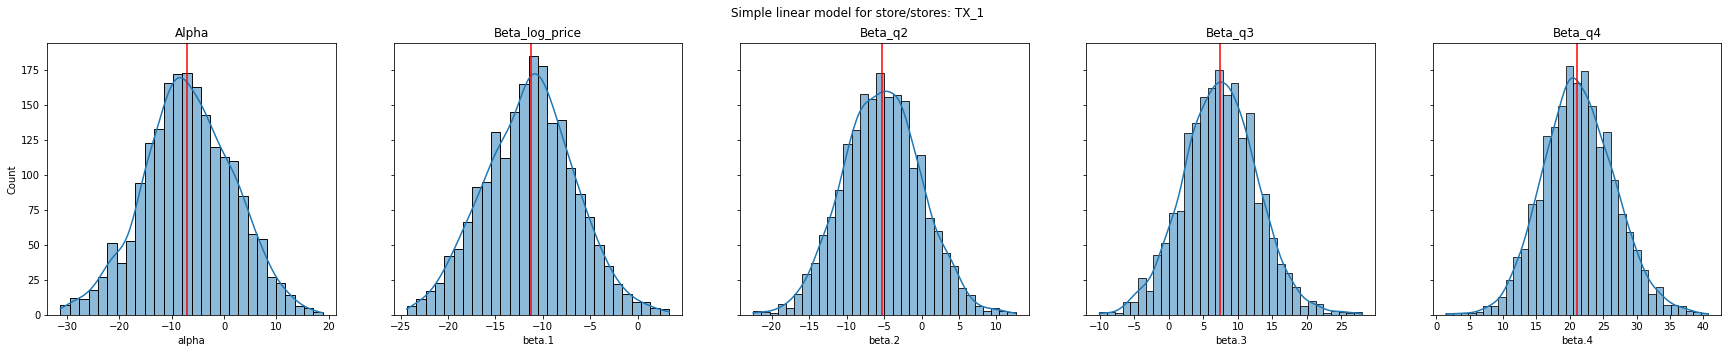

sMAPE:  173.17395493451076


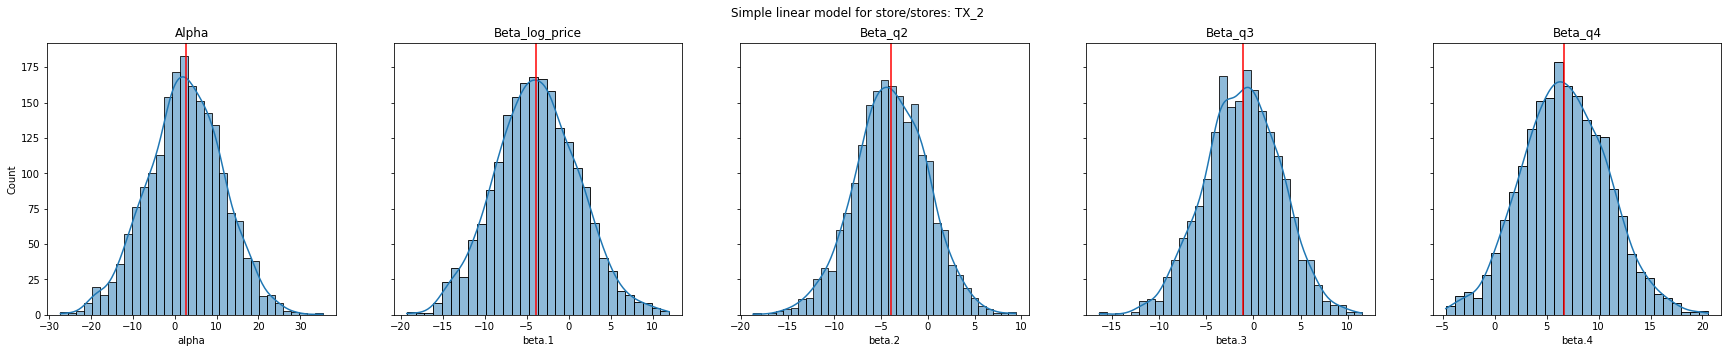

sMAPE:  198.703761787541


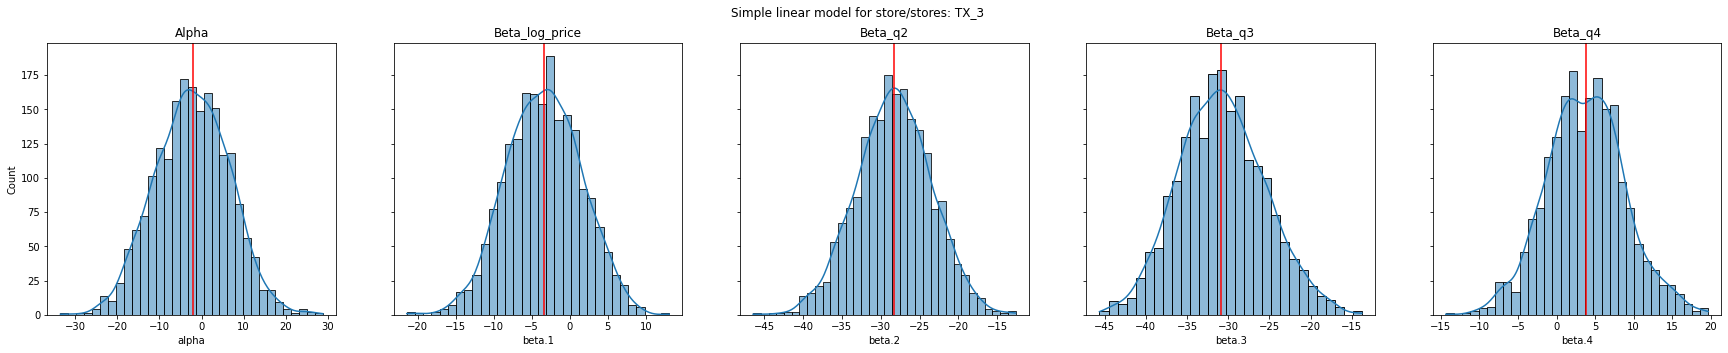

sMAPE:  200.0


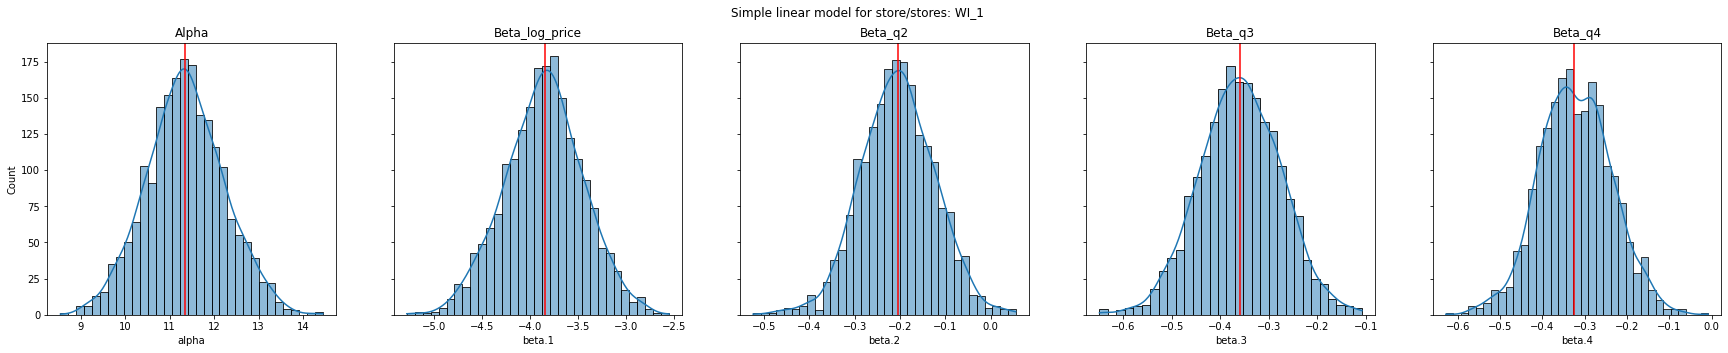

sMAPE:  199.61267308215835


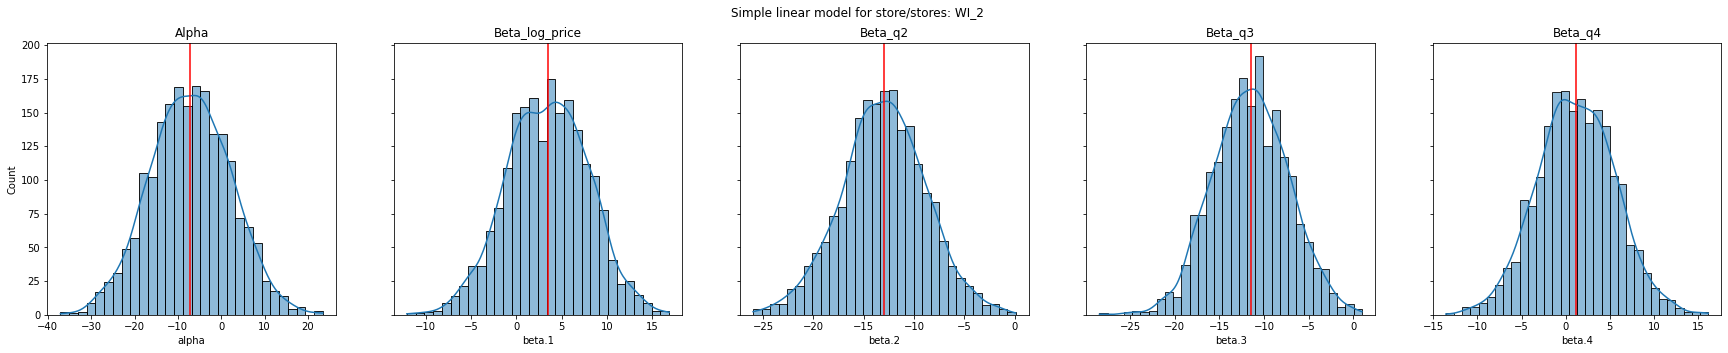

sMAPE:  114.70195762732493


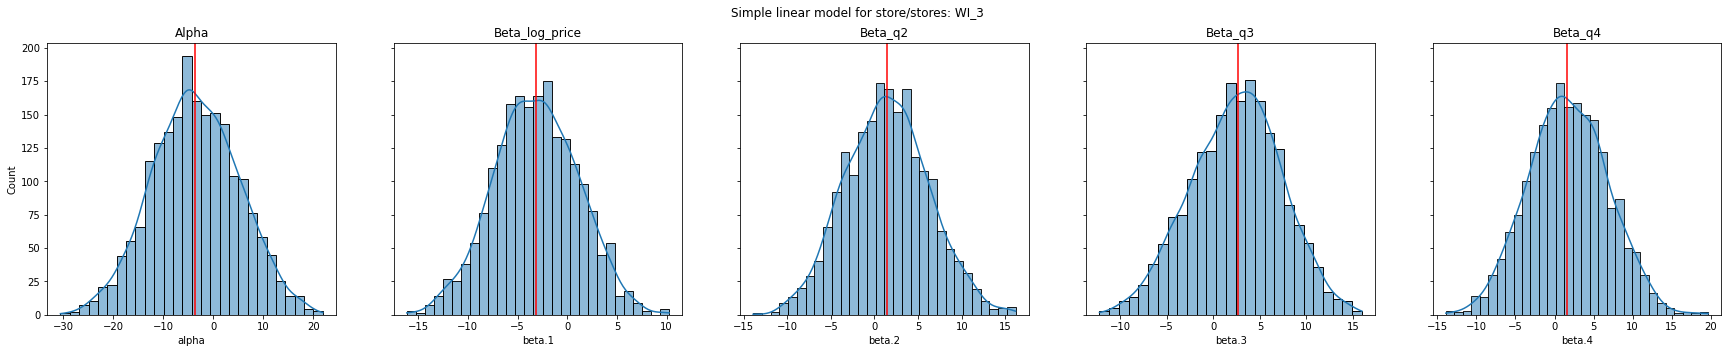

sMAPE:  198.95969074783068


In [5]:
# Plot for the separate betas model
multi_beta_model_container = unpickle_object('model_outputs/log_multiple_betas.pkl')
store_idx = list(multi_beta_model_container.keys())

pred = []
smape_cont = []
for store in store_idx:
    store_df = multi_beta_model_container[store]
    plot_simple_model_results(samples_df=store_df, shop_name=store, save=True, save_location='fit_plots/log_multiple_betas_' + store + '.png')

    local_test = model.create_test_data(train_date_split)
    local_test = local_test[local_test['store_id'] == store].reset_index(drop=True)
    p, smape = make_prediction_stan_sampling(store_df, local_test, True)
    smape_cont.append(smape)
    pred.append(p)
    print('sMAPE: ', smape)

In [6]:
print(np.round(np.mean(smape_cont),2))
print(np.round(np.std(smape_cont),2))

171.1
36.95


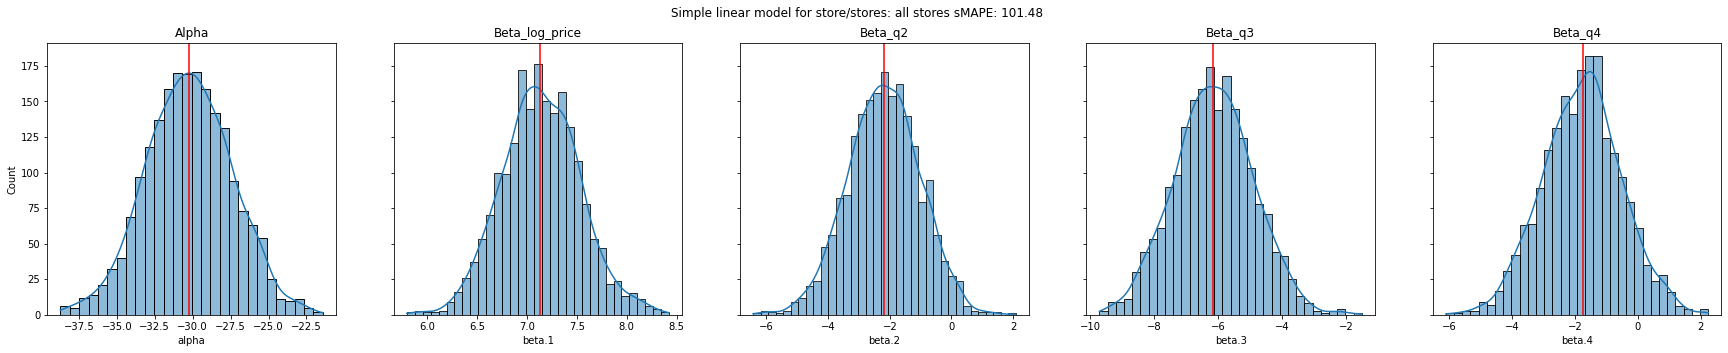

sMAPE:  101.48366557952458


In [40]:
## NON- LOGGED DATA
# plot for the single beta model
simple_model_container = unpickle_object('model_outputs/non_log_basic_model.pkl')
df_simple = simple_model_container['full']

local_test = model.create_test_data(train_date_split)
_, smape = make_prediction_stan_sampling(df_simple, local_test, False)

plot_simple_model_results(samples_df= df_simple, shop_name='all stores' + ' sMAPE: ' + str(np.round(smape,2)), save= True, save_location='fit_plots/non_log_simple_model.png')
print('sMAPE: ', smape)

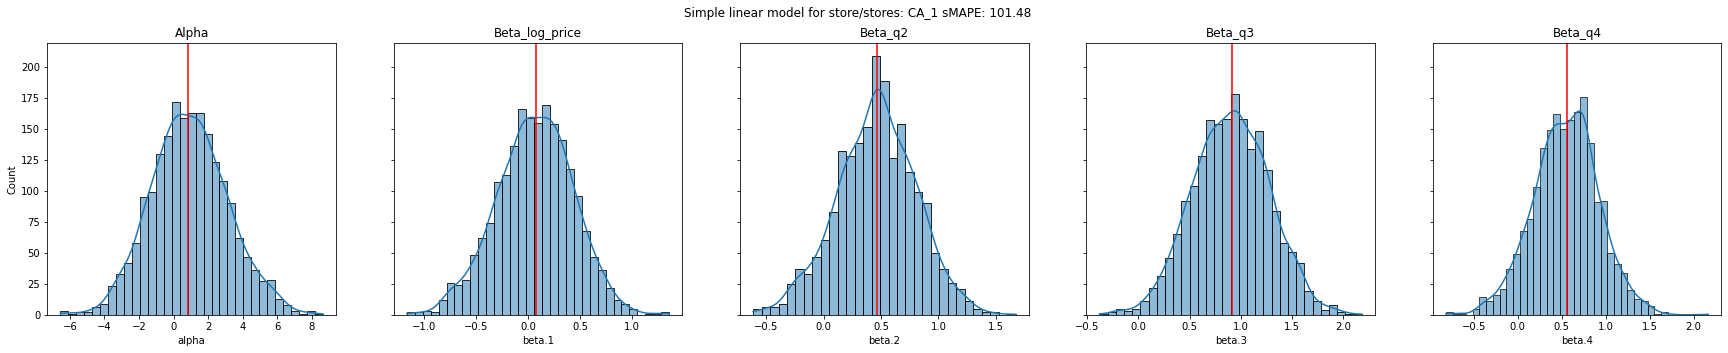

sMAPE:  125.40058575909013


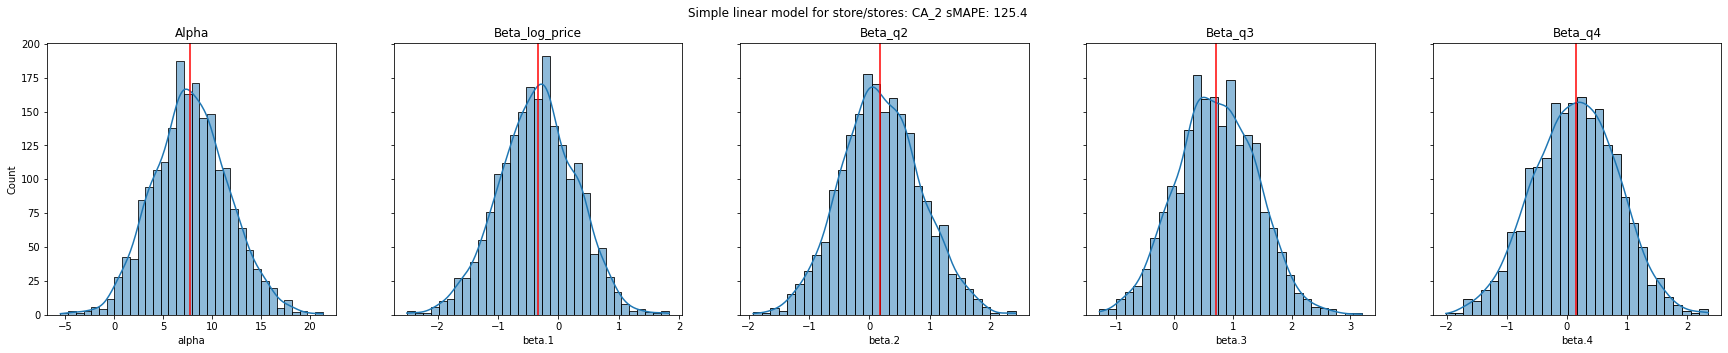

sMAPE:  200.0


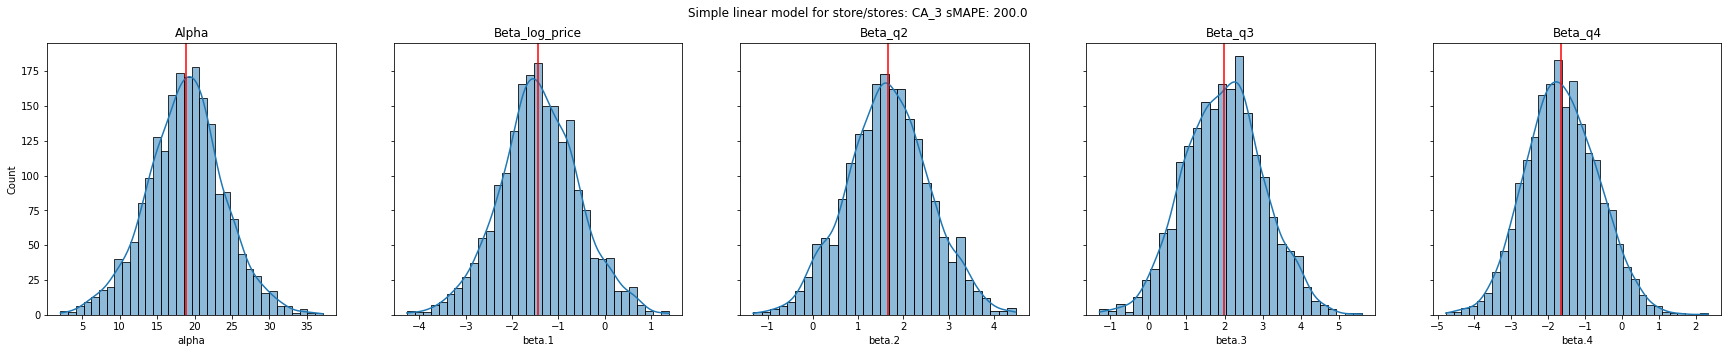

sMAPE:  200.0


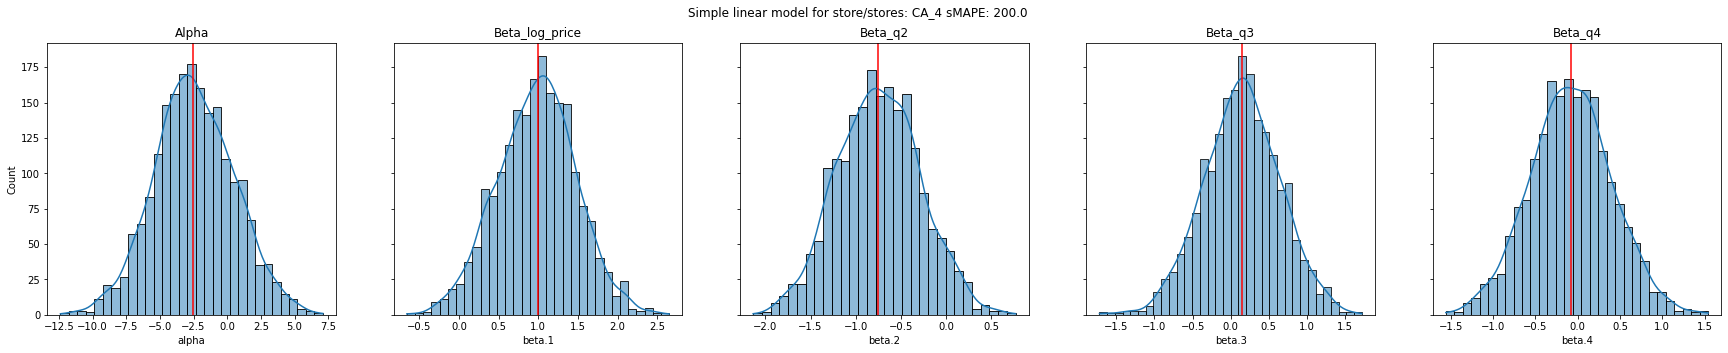

sMAPE:  78.33226708709734


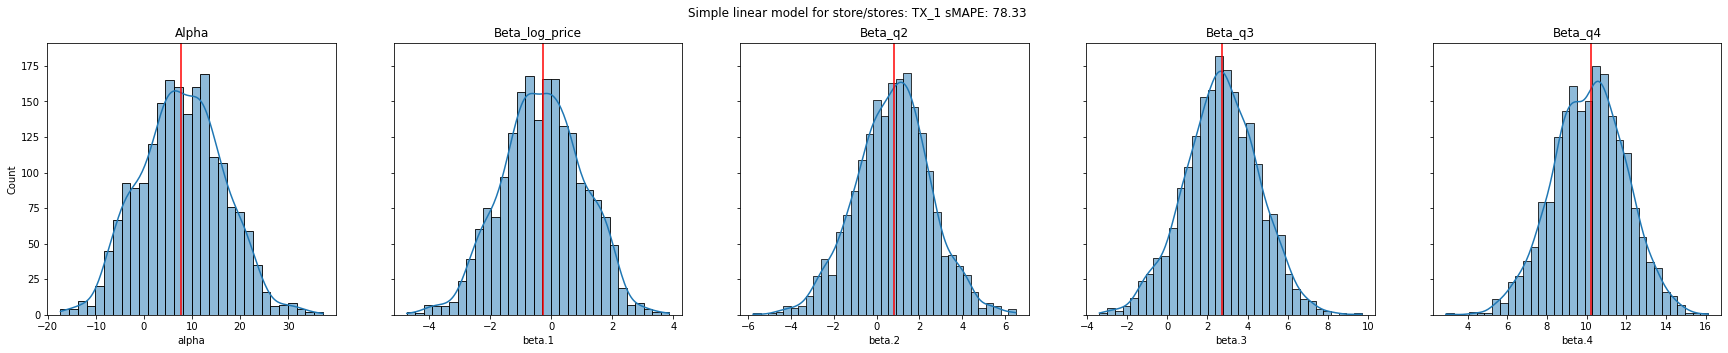

sMAPE:  176.38411661059334


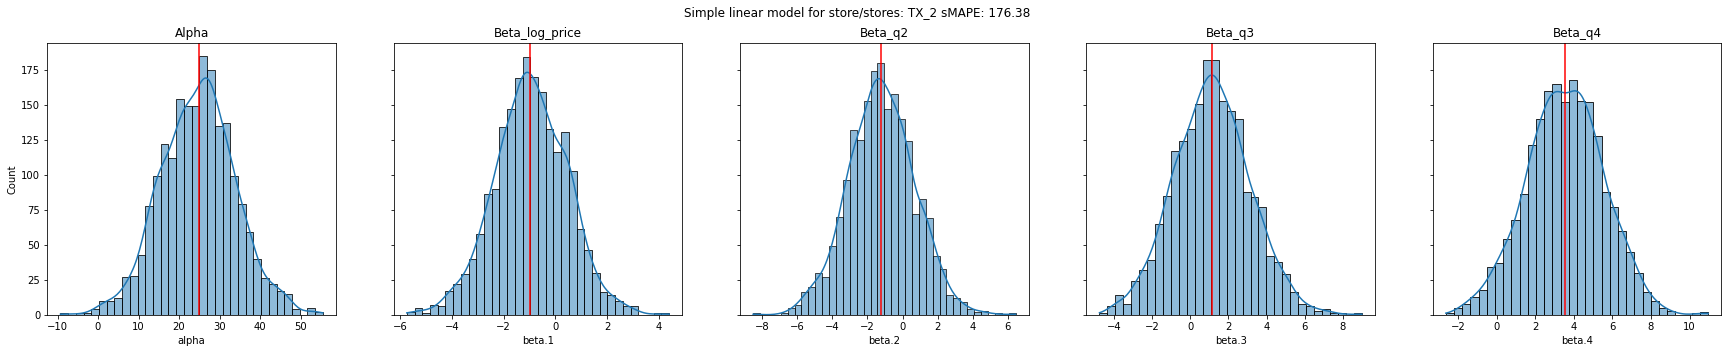

sMAPE:  200.0


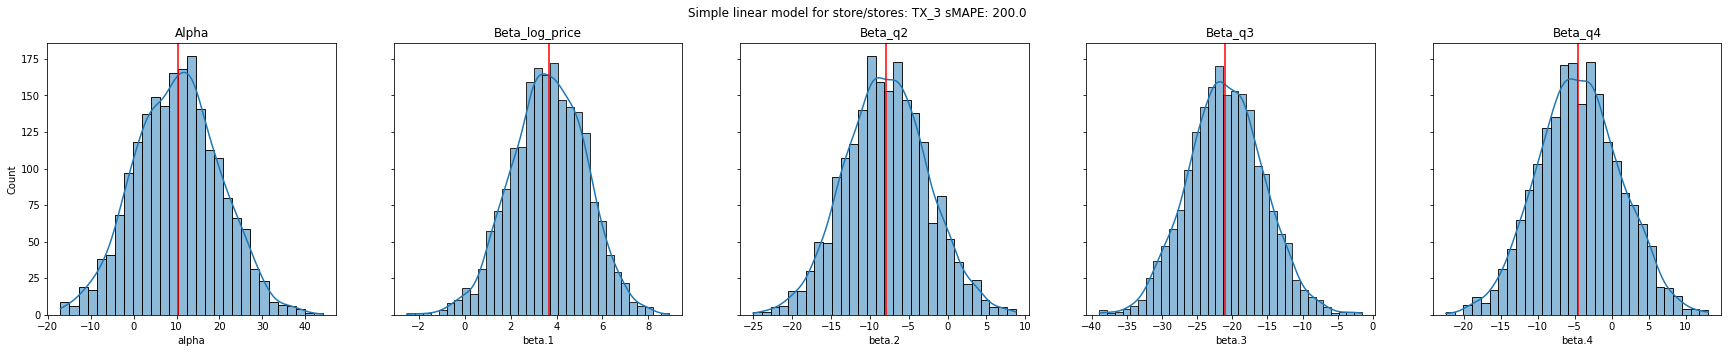

sMAPE:  167.68865366663542


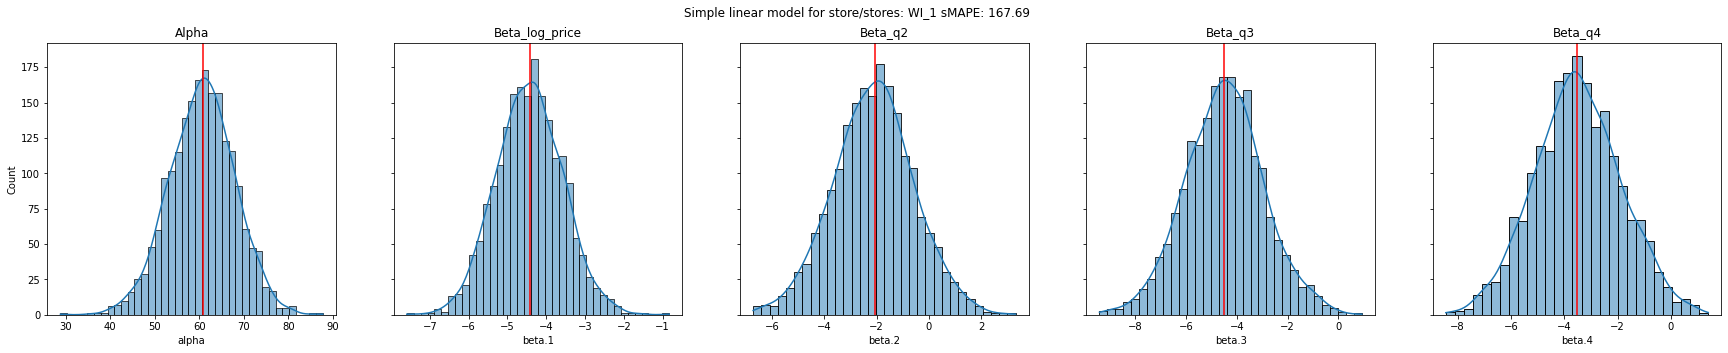

sMAPE:  200.0


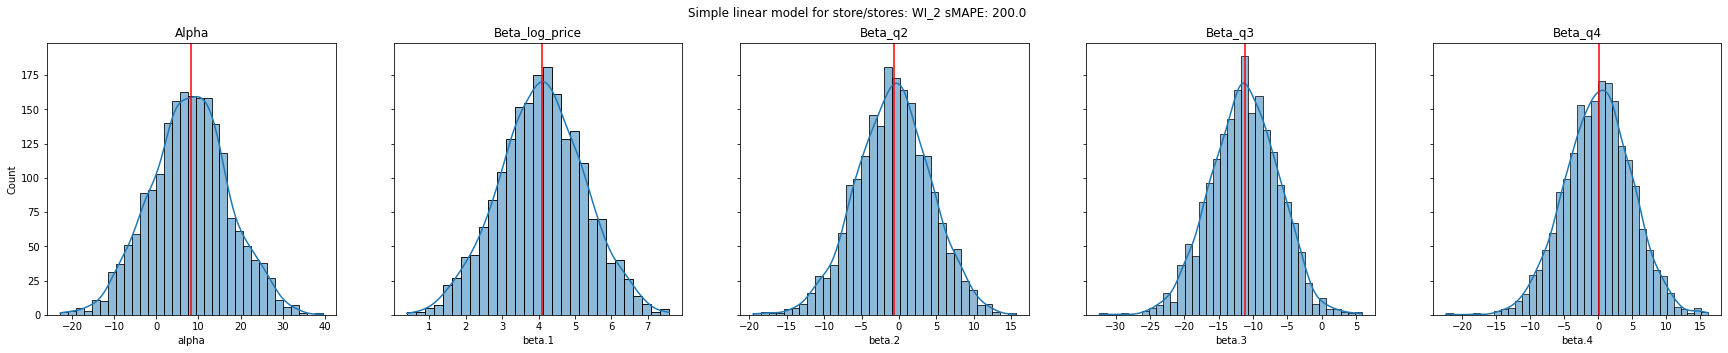

sMAPE:  151.77845000241803


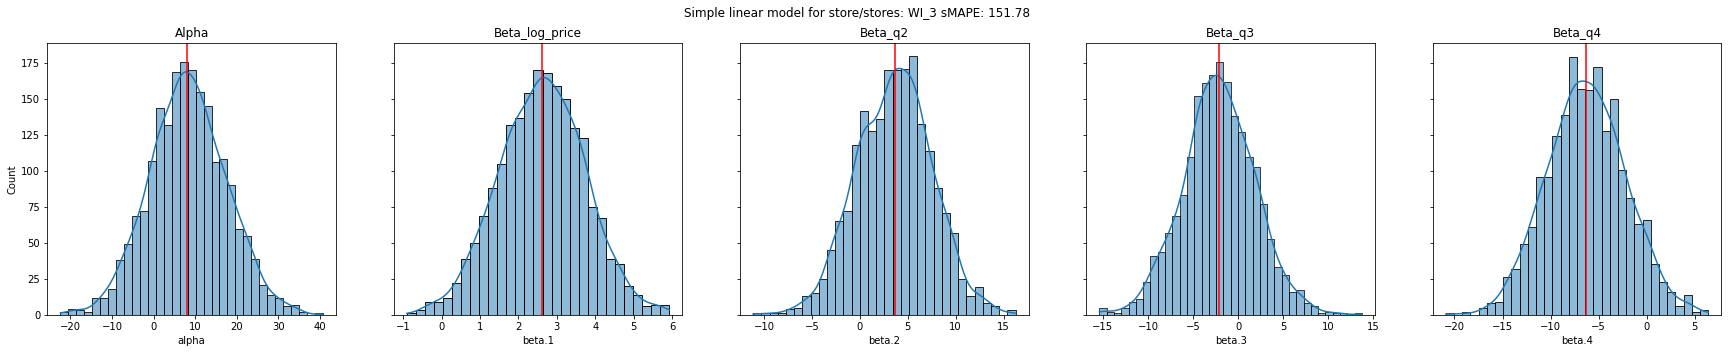

sMAPE:  118.83867817417429


In [8]:
# Plot for the separate betas model
multi_beta_model_container = unpickle_object('model_outputs/non_log_multiple_betas.pkl')
store_idx = list(multi_beta_model_container.keys())

smape_cont = []
pred = []
for store in store_idx:
    store_df = multi_beta_model_container[store]
    plot_simple_model_results(samples_df=store_df, shop_name=store + ' sMAPE: ' + str(np.round(smape,2)), save=True, save_location='fit_plots/non_log_multiple_betas_' + store + '.png')

    local_test = model.create_test_data(train_date_split)
    local_test = local_test[local_test['store_id'] == store].reset_index(drop=True)
    p, smape = make_prediction_stan_sampling(store_df, local_test, False)
    smape_cont.append(smape)
    pred.append(p)
    print('sMAPE: ', smape)

In [9]:
np.round(np.mean(smape_cont),2)

161.84

In [10]:
np.round(np.std(smape_cont),2)

40.4

In [38]:
## CLUSTER - LOGGED DATA
# plot for the single beta model
simple_model_container = unpickle_object('model_outputs/log_cluster_betas.pkl')
df_simple = simple_model_container['full']

local_test = model.create_test_data(train_date_split)
_, smape = make_prediction_stan_sampling(df_simple, local_test, True)

# plot_simple_model_results(samples_df= df_simple, shop_name='all stores' + ' sMAPE: ' + str(np.round(smape,2)), save= True, save_location='fit_plots/non_log_simple_model.png')
print('sMAPE: ', smape)

sMAPE:  176.76199419631533


In [44]:
## CLUSTER - NON LOGGED DATA
# plot for the single beta model
simple_model_container = unpickle_object('model_outputs/non_log_cluster_betas.pkl')
df_simple = simple_model_container['full']

local_test = model.create_test_data(train_date_split)
_, smape = make_prediction_stan_sampling(df_simple, local_test, True)

# plot_simple_model_results(samples_df= df_simple, shop_name='all stores' + ' sMAPE: ' + str(np.round(smape,2)), save= True, save_location='fit_plots/non_log_simple_model.png')
print('sMAPE: ', smape)

sMAPE:  129.80126695842705


In [4]:
temp_data = M5Data(day_start=1, day_end=1940)

In [15]:
clean_cut = temp_data.sales[['item_id', 'dept_id']].drop_duplicates()
dept_ids = clean_cut['dept_id'].unique().to_numpy()

In [19]:
x = clean_cut[clean_cut['dept_id'] == 'HOBBIES_1']

In [39]:
tickers = []
for dept_id in dept_ids:
     np.random.seed(1234)
     tmp = np.random.choice(clean_cut[clean_cut['dept_id'] == dept_id]['item_id'], 10)
     tickers.append(tmp)
utils.pickle_object(np.array(tickers).flatten(), 'tickers.pkl')

In [28]:
temp_data.sales[temp_data.sales['item_id'] == ]

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,3.0,5.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,2.0,2.0,1.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,0.0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,4.0,1.0,6.0,4.0,0.0,0.0,0.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,0.0,1.0,3.0,0.0,2.0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,1.0,0.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0.0,0.0,2.0,2.0,0.0,3.0,1.0,4.0,1.0,0.0,0.0,3.0,4.0,4.0,0.0,0.0,1.0,0.0,1.0,...,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,4.0,2.0,0.0,1.0,2.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0.0,6.0,0.0,2.0,2.0,4.0,1.0,8.0,5.0,2.0,7.0,5.0,3.0,5.0,20.0,8.0,10.0,3.0,3.0,...,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,4.0,6.0,0.0,1.0,1.0,1.0


In [29]:
queried_item = "item_id == 'HOBBIES_1_211'"

# model = Bayesian_model(day_start=1, day_end=1940)
model = Bayesian_model(day_start=1, day_end=1940)

model.query_model_data(query=queried_item)

Using query: item_id == 'HOBBIES_1_211'
Processed data for query: item_id == 'HOBBIES_1_211'


,store_id,date,state_id,demand,sell_price,log_Q,log_P,P,Q,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12,q_1,q_2,q_3,q_4
0,CA_1,2011-01-30,CA,0.0,NaN,-69.077553,NaN,NaN,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,CA_1,2011-02-06,CA,0.0,NaN,-69.077553,NaN,NaN,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,CA_1,2011-02-13,CA,0.0,NaN,-69.077553,NaN,NaN,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,CA_1,2011-02-20,CA,0.0,NaN,-69.077553,NaN,NaN,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,CA_1,2011-02-27,CA,0.0,NaN,-69.077553,NaN,NaN,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,WI_3,2016-04-24,WI,0.0,4.72,-69.077553,1.551809,4.72,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2776,WI_3,2016-05-01,WI,2.0,4.72,0.693147,1.551809,4.72,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2777,WI_3,2016-05-08,WI,3.0,4.72,1.098612,1.551809,4.72,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2778,WI_3,2016-05-15,WI,1.0,4.72,0.000000,1.551809,4.72,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [32]:
model.df_data_full.dropna()

,store_id,date,state_id,demand,sell_price,log_Q,log_P,P,Q,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12,q_1,q_2,q_3,q_4
163,CA_1,2014-03-16,CA,0.0,4.98,-69.077553,1.605430,4.98,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
164,CA_1,2014-03-23,CA,3.0,4.98,1.098612,1.605430,4.98,3.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
165,CA_1,2014-03-30,CA,4.0,4.98,1.386294,1.605430,4.98,4.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
166,CA_1,2014-04-06,CA,2.0,4.98,0.693147,1.605430,4.98,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
167,CA_1,2014-04-13,CA,0.0,4.98,-69.077553,1.605430,4.98,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,WI_3,2016-04-24,WI,0.0,4.72,-69.077553,1.551809,4.72,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2776,WI_3,2016-05-01,WI,2.0,4.72,0.693147,1.551809,4.72,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2777,WI_3,2016-05-08,WI,3.0,4.72,1.098612,1.551809,4.72,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2778,WI_3,2016-05-15,WI,1.0,4.72,0.000000,1.551809,4.72,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [182]:
unpickle_object('simple_mape.pkl')

{'FOODS_1_093': 200.0,
 'FOODS_1_096': 100.38831634568412,
 'FOODS_1_199': 200.0,
 'FOODS_2_058': 77.59950874500882,
 'FOODS_2_298': 199.99999999999997,
 'HOBBIES_1_157': 200.0,
 'HOBBIES_1_312': 180.31777429494335,
 'HOBBIES_1_381': 200.0,
 'HOBBIES_2_048': 136.22072380277905,
 'HOBBIES_2_144': nan,
 'HOUSEHOLD_2_155': 200.0,
 'HOUSEHOLD_2_159': 199.84984385148414,
 'HOUSEHOLD_2_235': 200.0,
 'HOUSEHOLD_2_296': 200.0,
 'HOUSEHOLD_2_376': 200.0}

In [390]:
unpickle_object('multiple_mape2.pkl')

{'FOODS_1_093': [200.0,
  200.0,
  200.0,
  125.39388866474233,
  200.0,
  200.0,
  200.0,
  200.0,
  200.0,
  200.0],
 'FOODS_1_096': [89.13737777640907,
  200.0,
  200.0,
  77.2798435184051,
  200.0,
  200.0,
  200.0,
  200.0,
  200.0,
  200.0],
 'FOODS_1_199': [200.0,
  200.0,
  200.0,
  200.0,
  200.0,
  200.0,
  90.4109517601428,
  200.0,
  185.16552946755124,
  200.0],
 'FOODS_2_058': [173.8728144641104,
  200.0,
  145.9384012998843,
  200.0,
  170.55480359131454,
  46.089688391420594,
  40.30782698417717,
  104.82433112845003,
  187.35889029195187,
  104.27692180605564],
 'FOODS_2_298': [200.0,
  127.95800582655015,
  200.0,
  200.0,
  200.0,
  200.0,
  200.0,
  200.0,
  200.0],
 'HOBBIES_1_157': [200.0,
  200.0,
  171.98803264154716,
  200.0,
  77.75527620209225,
  200.0,
  120.1967093484691,
  200.0,
  200.0,
  200.0],
 'HOBBIES_1_312': [134.67612555320525,
  200.0,
  100.64361615407725,
  200.0,
  177.43478024641632,
  200.0,
  200.0,
  200.0,
  170.25453242139056,
  200.0],


In [28]:
cluster = unpickle_object('cluster_region_mape0.pkl')
#cluster = unpickle_object('simple_mape.pkl')
# cluster = unpickle_object('multiple_mape.pkl')
#cluster = unpickle_object('cluster_mape.pkl')
for i in cluster.keys():
    print(np.round(np.mean(cluster[i]),5))

148.10329
82.7531
152.80933
120.93259
138.217
103.56865
133.02646
58.03903
180.24024
181.01912
153.89292
92.16378
137.06051
99.03322
81.21268


In [269]:
x = unpickle_object('cluster_results_region1.pkl')
list(x.keys())
#x['FOODS_1_093']['full']

['full', 'FOODS_2_298']

In [92]:
reduced = temp_data.sales[['cat_id', 'item_id', 'dept_id']].drop_duplicates()
reduced

,cat_id,item_id,dept_id
0,HOBBIES,HOBBIES_1_001,HOBBIES_1
1,HOBBIES,HOBBIES_1_002,HOBBIES_1
2,HOBBIES,HOBBIES_1_003,HOBBIES_1
3,HOBBIES,HOBBIES_1_004,HOBBIES_1
4,HOBBIES,HOBBIES_1_005,HOBBIES_1
...,...,...,...
3044,FOODS,FOODS_3_823,FOODS_3
3045,FOODS,FOODS_3_824,FOODS_3
3046,FOODS,FOODS_3_825,FOODS_3
3047,FOODS,FOODS_3_826,FOODS_3


In [103]:
reduced[reduced['dept_id']=='HOUSEHOLD_3']4705

,cat_id,item_id,dept_id


In [117]:
from scipy import stats
regressors = (
                ['sell_price']
                + True * ["q_" + str(i + 1) for i in range(1, 4)])
regressors

['sell_price', 'q_2', 'q_3', 'q_4']

In [118]:
full = model.df_data_full.dropna()
x = full[regressors].to_numpy()
y = full['demand'].to_numpy()

In [119]:
slope, intercept, r, p, se = stats.linregress(x, y)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 1 has size 1122

In [115]:
intercept

113.28142010297812

In [120]:
import statsmodels.api as sm

In [121]:
# Linear regression - fit the model using all the data
x = sm.add_constant(full[regressors].to_numpy(), prepend=True)
y = full['demand'].to_numpy()

In [123]:
x = sm.add_constant(full[regressors].to_numpy(), prepend=True)
y = full['demand'].to_numpy()
mod = sm.OLS(y, x)
res = mod.fit()
mu_alfa, mu_beta, mu_d2, mu_d3, mu_d4 = res.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     67.96
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           1.62e-51
Time:                        02:45:00   Log-Likelihood:                -3711.0
No. Observations:                1122   AIC:                             7432.
Df Residuals:                    1117   BIC:                             7457.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.0194      7.374     15.598      0.0

In [132]:
np.mean(np.random.random((2,5)), axis = 0)

array([0.51110423, 0.75370342, 0.41558913, 0.50697796, 0.44895443])

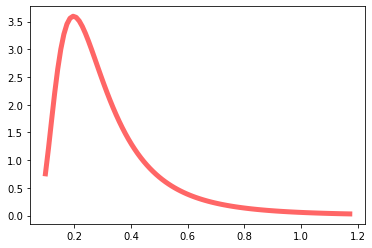

In [136]:
from scipy.stats import invgamma
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
a = 4.07
mean, var, skew, kurt = invgamma.stats(a, moments='mvsk')
x = np.linspace(invgamma.ppf(0.01, a),invgamma.ppf(0.99, a), 100)
ax.plot(x, invgamma.pdf(x, a),'r-', lw=5, alpha=0.6, label='invgamma pdf')

plt.show()

In [198]:
len(model.create_test_data(train_date_split)['date'].unique())

43

In [303]:
sns.set_style()

In [310]:
def plot_trace(param, param_name='parameter'):
  """Plot the trace and posterior of a parameter."""

  # Summary statistics
  mean = np.mean(param)
  median = np.median(param)
  cred_min, cred_max = np.percentile(param, 2.5), np.percentile(param, 97.5)

  # Plotting
  plt.subplot(2,1,1)
  plt.plot(param, linewidth=0.4, alpha=0.7)
  plt.xlabel('samples')
  plt.ylabel(param_name)
  plt.axhline(mean, color='r', lw=2, linestyle='--')
  plt.axhline(median, color='c', lw=2, linestyle='--')
  plt.axhline(cred_min, linestyle=':', color='k', alpha=0.2)
  plt.axhline(cred_max, linestyle=':', color='k', alpha=0.2)
  plt.title('Trace and Posterior Distribution for {}'.format(param_name))

  plt.subplot(2,1,2)
  plt.hist(param, 30, density=True, alpha=0.7); sns.kdeplot(param, shade=True)
  plt.xlabel(param_name)
  plt.ylabel('density')
  plt.axvline(mean, color='r', lw=2, linestyle='--',label='mean')
  plt.axvline(median, color='c', lw=2, linestyle='--',label='median')
  plt.axvline(cred_min, linestyle=':', color='k', alpha=0.2, label='95% CI')
  plt.axvline(cred_max, linestyle=':', color='k', alpha=0.2)

  plt.gcf().tight_layout()

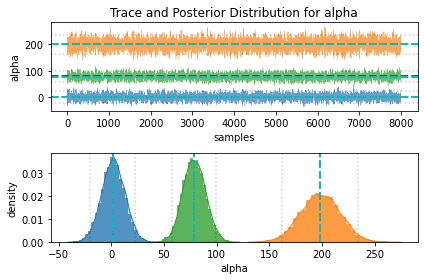

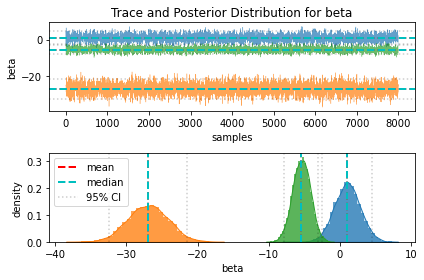

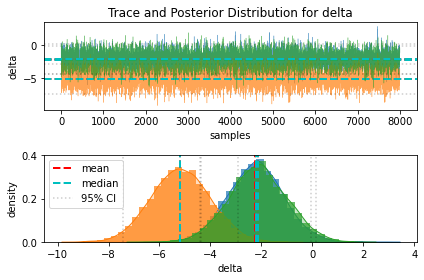

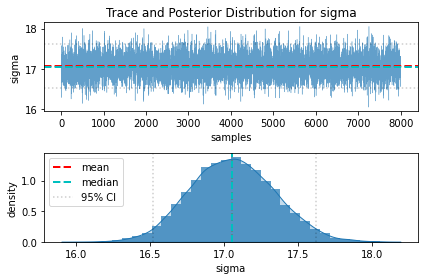

In [376]:
x = unpickle_object('cluster_results_region2.pkl')
# x = x['HOBBIES_1_157']
x = x['FOODS_1_096']
x = x['full']


plot_trace(x['alpha.1'])

plot_trace(x['alpha.2'])
plot_trace(x['alpha.3'], 'alpha')
plt.show()
plt.savefig('alpha')


plot_trace(x['beta.1'])
plt.legend(loc='upper left')
plot_trace(x['beta.2'])
plot_trace(x['beta.3'], 'beta')
plt.show()
plt.savefig('beta')

plot_trace(x['delta.1'])
plt.legend(loc='upper left')
plot_trace(x['delta.2'])
plot_trace(x['delta.3'], 'delta')
plt.savefig('delta')
plt.show()

plot_trace(x['sigma'], 'sigma')
plt.legend(loc='upper left')
plt.savefig('sigma')
plt.show()

In [2]:
x = unpickle_object('model_outputs/firstjunk.pkl')
y = unpickle_object('model_outputs/secondjunk.pkl')
# x = x['HOBBIES_1_157']
x = x['full']
y = y['full']
x.head()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,alpha.1,alpha.2,alpha.3,beta.1,beta.2,beta.3,delta.1,delta.2,delta.3,tau.1,tau.2,tau.3,y_new.1,y_new.2,y_new.3,y_new.4,y_new.5,...,y_new.1465,y_new.1466,y_new.1467,y_new.1468,y_new.1469,y_new.1470,y_new.1471,y_new.1472,y_new.1473,y_new.1474,y_new.1475,y_new.1476,y_new.1477,y_new.1478,y_new.1479,y_new.1480,y_new.1481,y_new.1482,y_new.1483,y_new.1484,y_new.1485,y_new.1486,y_new.1487,y_new.1488,y_new.1489
draws,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-2787.183121,0.882201,0.031855,6.0,63.0,0.0,2791.828039,4.002194,3.116271,3.222285,-7.636388,0.196376,0.726995,2.994805,-0.539805,-0.385397,-1.474513,0.640095,0.918680,1.233779,-0.185642,8.307879,-1.487239,4.668458,3.856517,...,0.730881,-0.436246,8.370185,14.401043,11.964279,9.209678,7.427220,0.351084,6.557834,4.959938,10.612067,10.276905,2.759076,-2.348463,3.942226,10.814102,8.308019,11.638301,2.474965,2.747354,5.600259,9.209025,10.304499,8.182136,11.120718
1,-2786.666420,0.876550,0.031301,7.0,127.0,0.0,2799.477848,3.872601,-4.184195,5.692893,-13.947028,1.721195,0.107861,4.331841,-0.404381,-0.284348,-1.453024,1.186108,0.134536,2.489287,9.017081,1.655057,3.160203,2.433784,4.929293,...,11.101811,9.350770,3.097043,-0.863396,9.595246,6.622802,4.856385,9.595995,6.100503,2.963677,4.561931,11.636675,11.639840,6.425804,1.828417,10.122556,8.004205,7.047724,2.754291,4.407185,5.498296,16.589185,6.805927,7.157926,4.807247
2,-2788.444587,0.997763,0.029105,7.0,127.0,0.0,2795.080533,3.938422,-1.377157,5.783539,-6.281916,1.155632,0.087850,2.784898,-0.692176,-0.766064,-1.247830,1.089479,0.433218,5.260195,4.406696,2.527169,3.208150,-1.403156,1.864139,...,10.289303,10.774334,7.261555,7.170805,12.692843,5.265425,10.927956,8.828231,5.391602,7.261524,6.274919,10.630355,6.528729,8.433357,10.606384,7.517634,8.264413,-2.497804,3.203830,4.824390,8.929973,9.626933,3.815366,11.646201,7.101315
3,-2784.002337,0.952380,0.030501,7.0,127.0,0.0,2796.348709,3.956487,0.950941,2.827847,-15.227203,0.606218,0.794796,4.629645,-0.456520,-0.409144,-1.404319,0.954766,0.858038,5.606683,5.399390,3.379287,8.086250,1.936148,7.153011,...,7.348310,9.079088,6.310107,1.719720,5.071561,10.224336,0.581833,1.146956,12.889287,5.159762,10.185558,6.602342,14.744662,12.378687,12.020761,11.683900,3.712877,11.312334,6.313718,7.246482,4.748838,10.169034,5.037644,9.239833,10.685104
4,-2785.411425,0.951386,0.031855,7.0,127.0,0.0,2792.805809,3.889836,0.060160,2.428020,-15.381147,0.858750,0.911139,4.695791,-0.397622,-0.537879,-1.549655,1.770835,1.488061,9.341562,11.173226,5.265113,-2.653923,7.652019,-1.849363,...,6.207656,5.422878,4.380891,12.686107,10.814619,8.773919,15.450426,5.159701,4.112947,5.337559,9.542916,8.807932,1.440757,11.007058,8.476197,4.950234,5.314397,8.270257,9.711225,7.346959,5.650880,4.989218,9.967228,4.515049,5.512882


In [3]:
# initialize the dataset that was used for training
queried_item = "item_id == 'FOODS_2_058'"
model = Bayesian_model(day_start=1, day_end=1520)
_ = model.query_model_data(query=queried_item)

Using query: item_id == 'FOODS_2_058'
Processed data for query: item_id == 'FOODS_2_058'


In [5]:
train_date_split='2014-06-01'
train_data = model.create_train_data(train_date_split)
test_data = model.create_test_data(train_date_split)
len(train_data)

1489

In [10]:
train_lem = len(train_data)
prediction_len = len(test_data)

y_lower = np.quantile(x[['y_new.' + str(i) for i in range(1, train_lem + 1)]], 0.05, axis=0)
y_hat = np.mean(x[['y_new.' + str(i) for i in range(1, train_lem + 1)]],axis = 0).to_numpy()
y_upper = np.quantile(x[['y_new.' + str(i) for i in range(1, train_lem + 1)]], 0.95, axis=0)
train_data['y_hat'] = y_hat
train_data['y_low'] = y_lower
train_data['y_up'] = y_upper
train_data = train_data[['demand', 'y_hat', 'y_low', 'y_up', 'date', 'store_id']]


y_lower = np.quantile(x[['y_new.' + str(i) for i in range(1, prediction_len + 1)]], 0.05, axis=0)
y_hat = np.mean(x[['y_new.' + str(i) for i in range(1, prediction_len + 1)]],axis = 0).to_numpy()
y_upper = np.quantile(x[['y_new.' + str(i) for i in range(1, prediction_len + 1)]], 0.95, axis=0)
test_data['y_hat'] = y_hat
test_data['y_low'] = y_lower
test_data['y_up'] = y_upper
test_data = test_data[['demand', 'y_hat', 'y_low', 'y_up', 'date', 'store_id']]

In [19]:
CA_train = train_data[train_data['store_id'] == 'WI_1']
CA_test = test_data[test_data['store_id'] == 'WI_1']

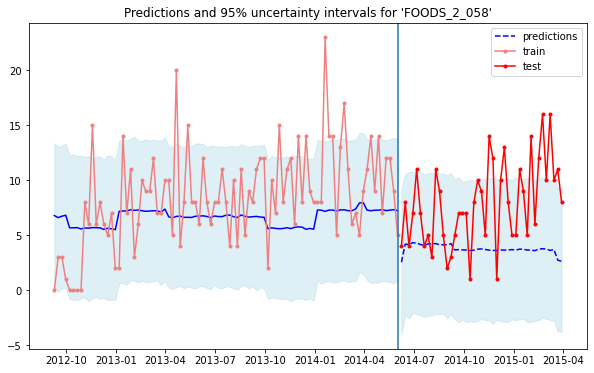

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(CA_train['date'], CA_train['y_hat'], c='blue')
ax.plot(CA_test['date'], CA_test['y_hat'], c='blue', ls='--', label='predictions')

ax.fill_between(CA_train['date'], CA_train['y_up'], CA_train['y_low'], color='lightblue', alpha=0.4)
ax.fill_between(CA_test['date'], CA_test['y_up'], CA_test['y_low'], color='lightblue', alpha=0.4)

ax.plot(CA_train['date'], CA_train['demand'], marker='.', c='lightcoral', label='train')
ax.plot(CA_test['date'], CA_test['demand'], marker='.', c='red', label='test')
ax.axvline(pd.to_datetime("2014-06-01"))
#
ax.set_title(f"Predictions and 95% uncertainty intervals for 'FOODS_2_058'")
ax.legend()
plt.show()

In [362]:
cutoff = "2014-06-01"

train_pred = forecast_mc[forecast_mc.ds <= cutoff]
test_pred = forecast_mc[forecast_mc.ds >= cutoff]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train_pred['ds'], train_pred['yhat'], c='blue')
ax.plot(test_pred['ds'], test_pred['yhat'], c='blue', ls='--', label='predictions')

ax.fill_between(forecast_mc['ds'], forecast_mc['yhat_upper'], forecast_mc['yhat_lower'], color='lightblue', alpha=0.4)

ax.plot(train['ds'], train['y'], marker='.', c='lightcoral', label='train')
ax.plot(test['ds'], test['y'], marker='.', c='red', label='test')
ax.axvline(pd.to_datetime(cutoff))

ax.set_title(f"Predictions and 95% uncertainty intervals for {item_id}")
ax.legend()
plt.show()

array([ -2.27747458,  -2.14267551,  -2.15708198,  -2.27918949,
        -2.05420739,  -2.3216101 ,  -2.28696383,  -2.26390343,
        -2.09828011,  -2.17894332,  -1.94737395,  -2.07685182,
        -2.1572404 ,  -2.07360783,  -2.11660635,  -2.16383625,
        -2.14425509,  -3.27273363,  -3.16420342,  -3.16460573,
        -3.06932223,  -2.93319371,  -3.30944311,  -3.13259537,
        -3.24112578,  -3.28155585,  -3.07420215,  -3.1256193 ,
        -3.10320903,  -3.1726807 ,  -1.64544429,  -1.60416026,
        -2.07254911,  -1.98095027,  -1.88178974,  -1.88884091,
        -1.90208899,  -2.15735858,  -2.07465446,  -1.98742307,
        -1.85302275,  -1.90425514,  -2.02723777,  -2.66656305,
        -2.31995337,  -2.01666517,  -2.23705439,  -1.9357158 ,
        -1.95031143,  -2.15715893,  -2.11703742,  -2.08404314,
        -2.01182436,  -2.05707587,  -2.1561619 ,  -1.96454749,
        -1.9077351 ,  -1.89880391,  -2.00698718,  -1.9370096 ,
        -3.13077697,  -3.14574287,  -3.21910772,  -3.13